# Importing the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_dataset = pd.read_excel('Data_Train.xlsx')

In [3]:
train_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# EDA

In [4]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


<AxesSubplot:xlabel='Airline', ylabel='count'>

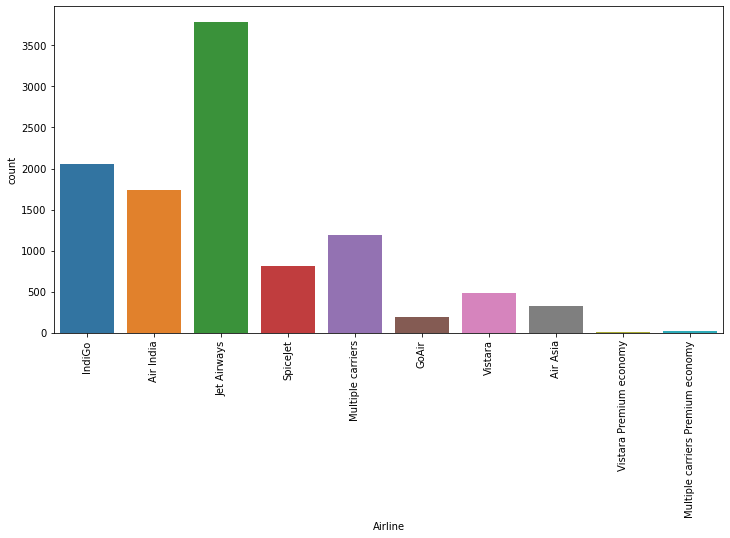

In [61]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(x='Airline', data=train_dataset)

<AxesSubplot:xlabel='Airline', ylabel='Price'>

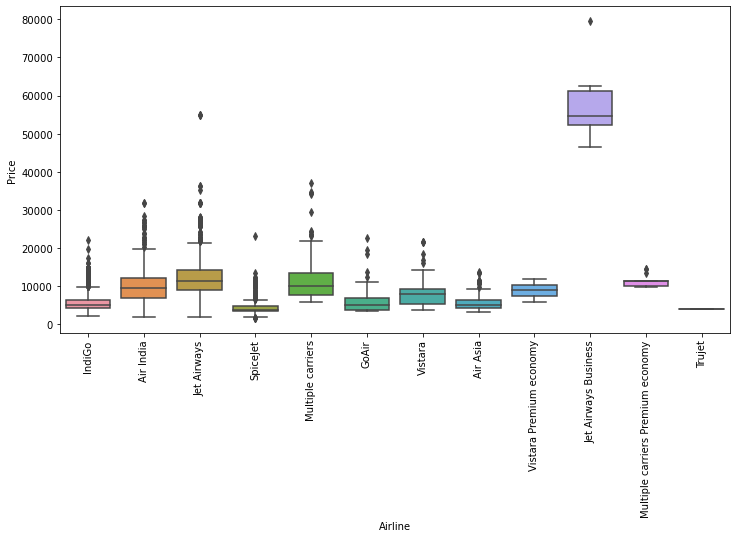

In [6]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.boxplot(x='Airline', y='Price', data=train_dataset)

Jet Airways has the highest ticket price

<AxesSubplot:xlabel='Source', ylabel='Price'>

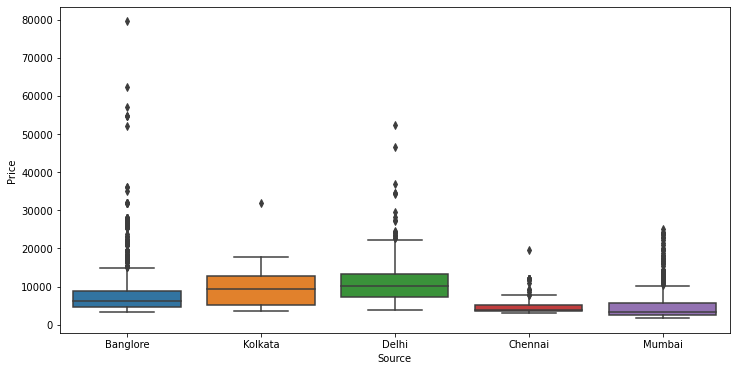

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Source', y='Price', data=train_dataset)

<AxesSubplot:xlabel='Destination', ylabel='Price'>

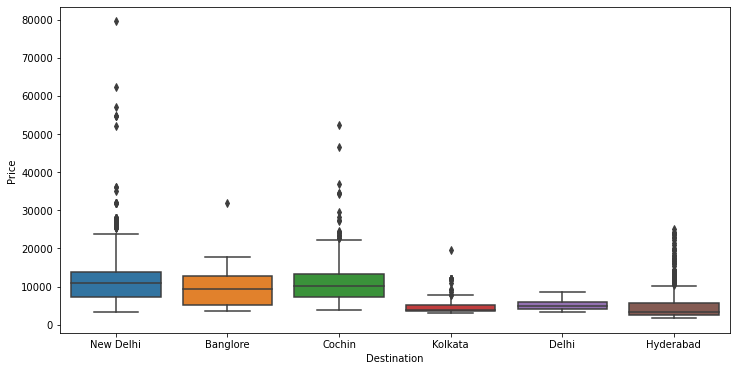

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Destination', y='Price', data=train_dataset)

# Data preprocessing

## Dropping missing values

In [9]:
train_dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_dataset = train_dataset.dropna()

## Handling outliers

In [11]:
train_dataset['Price'].describe()

count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [12]:
Q1 = np.percentile(train_dataset['Price'], 25)
Q3 = np.percentile(train_dataset['Price'], 75)
IQR = Q3-Q1

lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5

In [13]:
train_dataset = train_dataset[(train_dataset['Price'] >= lower_bound) & (train_dataset['Price'] <= upper_bound)]

In [14]:
train_dataset.shape

(10588, 11)

## Feature extraction

Date_of_Journey is a object data type. Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

In [15]:
train_dataset['Journey_day'] = pd.to_datetime(train_dataset['Date_of_Journey']).dt.day
train_dataset['Journey_month'] = pd.to_datetime(train_dataset['Date_of_Journey']).dt.month

In [16]:
train_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


From the Dep_Time and Arrival_Time column, we will extract the hour and minute information

In [17]:
train_dataset['Departure_hour'] = pd.to_datetime(train_dataset['Dep_Time']).dt.hour
train_dataset['Departure_minute'] = pd.to_datetime(train_dataset['Dep_Time']).dt.minute

In [18]:
train_dataset['Arrival_hour'] = pd.to_datetime(train_dataset['Arrival_Time']).dt.hour
train_dataset['Arrival_minute'] = pd.to_datetime(train_dataset['Arrival_Time']).dt.minute

In [19]:
train_dataset['Duration_hour'] = train_dataset['Duration'].apply(lambda x: x.split('h')[0] if 'h' in x else 0)
train_dataset['Duration_minute'] = train_dataset['Duration'].apply(lambda x: x.split('m')[0].split()[-1] if 'm' in x else 0)

In [20]:
train_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


We will replace the strings in Total_Stops column into integers

In [21]:
train_dataset['Total_Stops'].value_counts()

1 stop      5550
non-stop    3488
2 stops     1504
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [22]:
train_dataset['Total_Stops'] = train_dataset['Total_Stops'].replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4})

In [23]:
train_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,3,1,16,50,21,35,4,45


In [24]:
train_dataset['Additional_Info'].value_counts()

No info                         8267
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                     9
Change airports                    6
No Info                            3
Red-eye flight                     1
Name: Additional_Info, dtype: int64

We will drop the Route column as this is similar to the Total_Stops column. We will also drop the Additional_Info column as it contains mostly No info

In [25]:
train_dataset = train_dataset.drop(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Additional_Info'], axis=1)

In [26]:
train_dataset.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,45


## Onehot encoding of categorical features

In [27]:
# categorical_dummies = pd.get_dummies(train_dataset[['Airline', 'Source', 'Destination']], drop_first=True)

In [28]:
# categorical_dummies.head()

In [29]:
# train_dataset = pd.concat([train_dataset.drop(['Airline', 'Source', 'Destination'], axis=1), categorical_dummies], axis=1)

In [30]:
# train_dataset.head()

In [31]:
# train_dataset.info()

In [32]:
train_dataset['Duration_hour'] = train_dataset['Duration_hour'].astype('int')
train_dataset['Duration_minute'] = train_dataset['Duration_minute'].astype('int')

In [33]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10588 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10588 non-null  object
 1   Source            10588 non-null  object
 2   Destination       10588 non-null  object
 3   Total_Stops       10588 non-null  int64 
 4   Price             10588 non-null  int64 
 5   Journey_day       10588 non-null  int64 
 6   Journey_month     10588 non-null  int64 
 7   Departure_hour    10588 non-null  int64 
 8   Departure_minute  10588 non-null  int64 
 9   Arrival_hour      10588 non-null  int64 
 10  Arrival_minute    10588 non-null  int64 
 11  Duration_hour     10588 non-null  int64 
 12  Duration_minute   10588 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [34]:
train_dataset['Airline'].value_counts()

Jet Airways                          3787
IndiGo                               2053
Air India                            1736
Multiple carriers                    1186
SpiceJet                              817
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [35]:
train_dataset = train_dataset[train_dataset['Airline'] != 'Trujet']

In [36]:
# train_dataset['Airline'].value_counts()

In [37]:
# train_dataset.columns

## Test set

In [38]:
# test_dataset = pd.read_excel('Test_set.xlsx')

In [39]:
# test_dataset.head()

## Preprocessing of test data

In [40]:
# test_dataset = test_dataset.dropna()

# test_dataset['Journey_day'] = pd.to_datetime(test_dataset['Date_of_Journey']).dt.day
# test_dataset['Journey_month'] = pd.to_datetime(test_dataset['Date_of_Journey']).dt.month

# test_dataset['Departure_hour'] = pd.to_datetime(test_dataset['Dep_Time']).dt.hour
# test_dataset['Departure_minute'] = pd.to_datetime(test_dataset['Dep_Time']).dt.minute

# test_dataset['Arrival_hour'] = pd.to_datetime(test_dataset['Arrival_Time']).dt.hour
# test_dataset['Arrival_minute'] = pd.to_datetime(test_dataset['Arrival_Time']).dt.minute

# test_dataset['Duration_hour'] = test_dataset['Duration'].apply(lambda x: x.split('h')[0] if 'h' in x else 0)
# test_dataset['Duration_minute'] = test_dataset['Duration'].apply(lambda x: x.split('m')[0].split()[-1] if 'm' in x else 0)

# test_dataset['Total_Stops'] = test_dataset['Total_Stops'].replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4})

# test_dataset = test_dataset.drop(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Additional_Info'], axis=1)

# categorical_dummies = pd.get_dummies(test_dataset[['Airline', 'Source', 'Destination']], drop_first=True)

# test_dataset = pd.concat([test_dataset.drop(['Airline', 'Source', 'Destination'], axis=1), categorical_dummies], axis=1)

In [41]:
# test_dataset.head()

In [42]:
# test_dataset = test_dataset.rename({'Total_Stops':'Stops'}, axis='columns')

In [43]:
# test_dataset.columns

<AxesSubplot:>

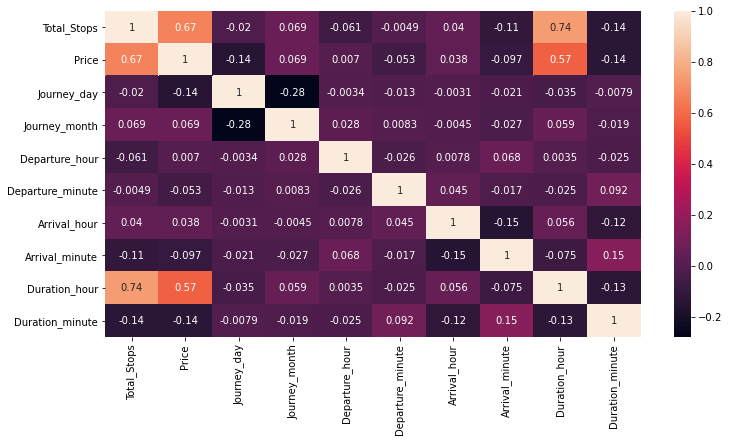

In [44]:
plt.figure(figsize=(12,6))
sns.heatmap(train_dataset.corr(), annot=True)

In [45]:
X = train_dataset.drop('Price', axis=1)
y = train_dataset['Price']

In [46]:
# X.columns

In [47]:
# ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
#        'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
#        'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
#        'Airline_Jet Airways', 'Airline_Jet Airways Business',
#        'Airline_Multiple carriers',
#        'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
#        'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
#        'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
#        'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
#        'Destination_Kolkata', 'Destination_New Delhi']

## Train-test split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model Building

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [51]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor

In [52]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## Random Forest

In [53]:
one_hot = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2])],remainder='passthrough')

reg = RandomForestRegressor()

rf_pipe = Pipeline([('one_hot',one_hot), ('reg',reg)])

rf_pipe.fit(X_train,y_train)

y_pred = rf_pipe.predict(X_test)

print('R2 score', r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))
print('MSE', mean_squared_error(y_test,y_pred))

R2 score 0.8212340900999893
MAE 1130.3055470934219
MSE 3158735.4273522026


In [54]:
#### Hyperparameter tuning ####

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                'bootstrap':[True, False],
                'criterion':['mse']}

rf_ran_cv = RandomizedSearchCV(estimator=reg, param_distributions=parameters, n_jobs=-1, cv=5, verbose=2)

rft_pipe = Pipeline([('one_hot',one_hot), ('ran_cv',rf_ran_cv)])

rft_pipe.fit(X_train,y_train)

y_pred = rft_pipe.predict(X_test)

print('R2 score', r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))
print('MSE', mean_squared_error(y_test,y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
R2 score 0.8508498075782067
MAE 1085.595216199238
MSE 2635435.341462094


## ExtraTrees

In [55]:
one_hot = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2])],remainder='passthrough')

reg = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

et_pipe = Pipeline([('one_hot',one_hot), ('reg',reg)])

et_pipe.fit(X_train,y_train)

y_pred = et_pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE', mean_squared_error(y_test,y_pred))

R2 score 0.8301664069650342
MAE 1163.6845408719284
MSE 3000904.296429455


In [56]:
#### Hyperparameter tuning ####

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                'bootstrap':[True, False],
                'criterion':['mse']
                }

et_ran_cv = RandomizedSearchCV(estimator=reg, param_distributions=parameters, n_jobs=-1, cv=5, verbose=2)

ett_pipe = Pipeline([('one_hot',one_hot), ('ran_cv',et_ran_cv)])

ett_pipe.fit(X_train,y_train)

y_pred = ett_pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE', mean_squared_error(y_test,y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
R2 score 0.8538667211609402
MAE 1085.6246969244312
MSE 2582127.4606677596


## XGBoost

In [57]:
one_hot = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2])],remainder='passthrough')

reg = XGBRegressor()

xgb_pipe = Pipeline([('one_hot',one_hot), ('reg',reg)])

xgb_pipe.fit(X_train,y_train)

y_pred = xgb_pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE', mean_squared_error(y_test,y_pred))

R2 score 0.8538341112867693
MAE 1101.4585823729085
MSE 2582703.6665276056


In [58]:
#### Hyperparameter tuning ####

parameters = {'max_depth': np.arange(2, 12, 2),  
              'alpha': [0, .001, .01, .1],
              'learning_rate': np.linspace(0.001, 0.6, 15),
              'colsample_bytree': np.linspace(0.1, 1, 5),
              'subsample': np.linspace(0.25, 1, 15),
              'n_estimators': np.arange(10, 200, 15),
              'min_child_weight':[1,3,5]}

xgb_ran_cv = RandomizedSearchCV(estimator=reg, param_distributions=parameters, n_jobs=-1, cv=5, verbose=2)

xgbt_pipe = Pipeline([('one_hot',one_hot), ('ran_cv',xgb_ran_cv)])

xgbt_pipe.fit(X_train,y_train)

y_pred = xgbt_pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE', mean_squared_error(y_test,y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
R2 score 0.8509098635810055
MAE 1153.1367051482089
MSE 2634374.171444991


In [60]:
import pickle

pickle.dump(train_dataset, open('df.pkl','wb'))
pickle.dump(ett_pipe, open('pipe.pkl','wb'))